In [1]:
import numpy as np
import matplotlib.pyplot as plt

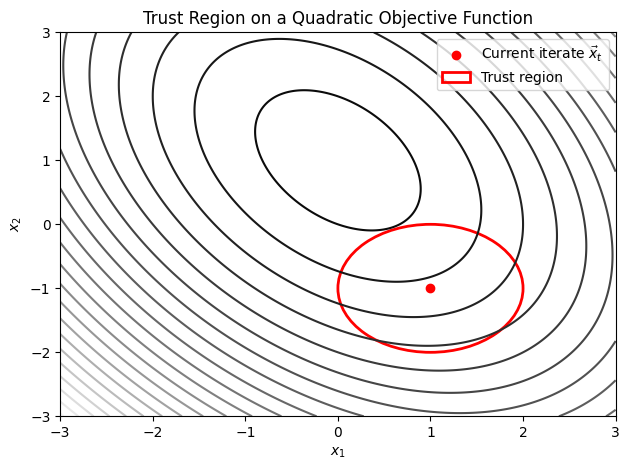

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function parameters
Q = np.array([[3, 1],
              [1, 2]])
b = np.array([-1, -2])

# Function to evaluate the quadratic function
def quadratic_function(x, Q, b):
    return 0.5 * x.T @ Q @ x + b.T @ x

# Create a grid of points
x_values = np.linspace(-3, 3, 400)
y_values = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_values, y_values)
Z = 0.5 * (Q[0, 0] * X**2 + 2 * Q[0, 1] * X * Y + Q[1, 1] * Y**2) + b[0] * X + b[1] * Y

# Current iterate and trust region radius
x_t = np.array([1.0, -1.0])
delta = 1.0

# Plotting
#fig, ax = plt.subplots(figsize=(8, 6))
fig, ax = plt.subplots()
contour = ax.contour(X, Y, Z, levels=20, cmap='gray')
ax.plot(x_t[0], x_t[1], 'ro', label='Current iterate $\\vec{x}_t$')

# Trust region (circle)
circle = plt.Circle((x_t[0], x_t[1]), delta, color='red', fill=False, linewidth=2, label='Trust region')
ax.add_artist(circle)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Trust Region on a Quadratic Objective Function')
ax.legend()
#plt.axis('equal')
plt.tight_layout()
plt.show()

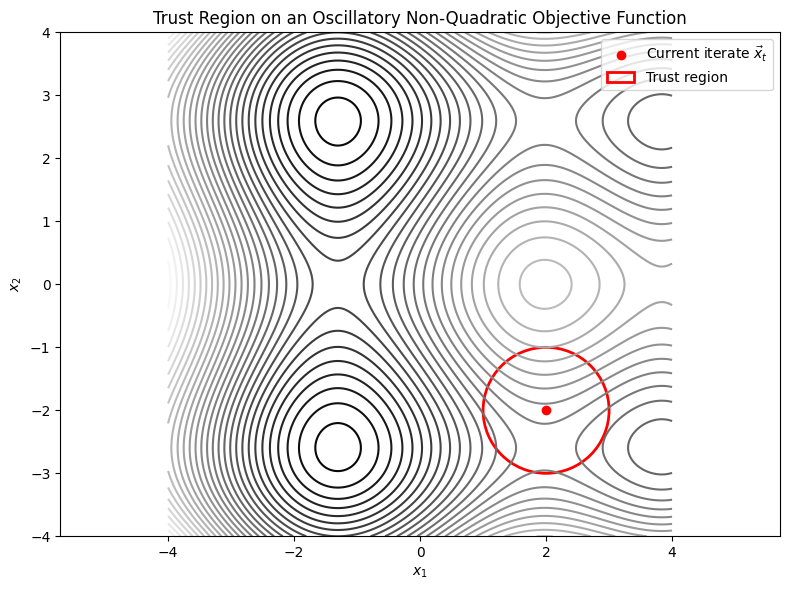

In [4]:
# Define the alternative non-quadratic function
def oscillatory_function(x):
    return np.sin(x[0]) + np.cos(x[1]) + 0.1 * (x[0]**2 + x[1]**2)

# Create a grid of points for plotting
x_values = np.linspace(-4, 4, 400)
y_values = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x_values, y_values)
Z = np.sin(X) + np.cos(Y) + 0.1 * (X**2 + Y**2)

# Current iterate and trust region radius
x_t = np.array([2.0, -2.0])
delta = 1.0

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
#fig, ax = plt.subplots()
contour = ax.contour(X, Y, Z, levels=30, cmap='gray')
ax.plot(x_t[0], x_t[1], 'ro', label='Current iterate $\\vec{x}_t$')

# Trust region (circle)
circle = plt.Circle((x_t[0], x_t[1]), delta, color='red', fill=False, linewidth=2, label='Trust region')
ax.add_artist(circle)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Trust Region on an Oscillatory Non-Quadratic Objective Function')
ax.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

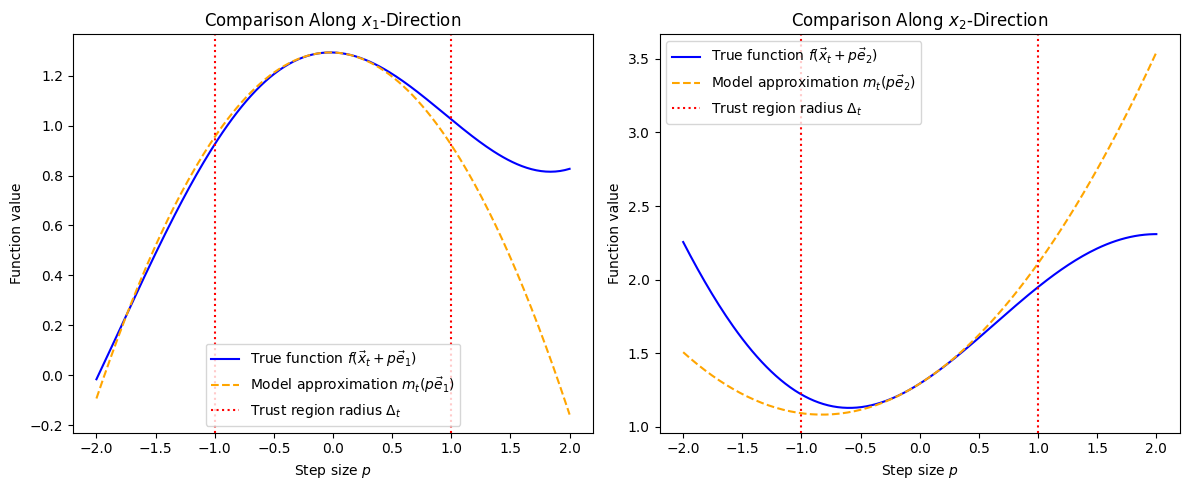

In [14]:
# Compute the gradient and Hessian at the current iterate
def grad_f(x):
    return np.array([np.cos(x[0]) + 0.2 * x[0], -np.sin(x[1]) + 0.2 * x[1]])

def hessian_f(x):
    return np.array([[-np.sin(x[0]) + 0.2, 0],
                     [0, -np.cos(x[1]) + 0.2]])

# Define the model function (quadratic approximation)
def model_function(p, x_t, grad, hess):
    return oscillatory_function(x_t) + grad @ p + 0.5 * p.T @ hess @ p

# Create points along a line (e.g., direction [1, 0] and [0, 1])
p_values = np.linspace(-2, 2, 200)
f_values_x = [oscillatory_function(x_t + np.array([p, 0])) for p in p_values]
m_values_x = [model_function(np.array([p, 0]), x_t, grad_f(x_t), hessian_f(x_t)) for p in p_values]

f_values_y = [oscillatory_function(x_t + np.array([0, p])) for p in p_values]
m_values_y = [model_function(np.array([0, p]), x_t, grad_f(x_t), hessian_f(x_t)) for p in p_values]

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot along x-direction
axs[0].plot(p_values, f_values_x, label='True function $f(\\vec{x}_t + p \\vec{e}_1)$', color='blue')
axs[0].plot(p_values, m_values_x, '--', label='Model approximation $m_t(p \\vec{e}_1)$', color='orange')
axs[0].axvline(x=1.0, color='red', linestyle=':', label='Trust region radius $\\Delta_t$')
axs[0].axvline(x=-1.0, color='red', linestyle=':')
axs[0].set_title('Comparison Along $x_1$-Direction')
axs[0].set_xlabel('Step size $p$')
axs[0].set_ylabel('Function value')
axs[0].legend()

# Plot along y-direction
axs[1].plot(p_values, f_values_y, label='True function $f(\\vec{x}_t + p \\vec{e}_2)$', color='blue')
axs[1].plot(p_values, m_values_y, '--', label='Model approximation $m_t(p \\vec{e}_2)$', color='orange')
axs[1].axvline(x=1.0, color='red', linestyle=':', label='Trust region radius $\\Delta_t$')
axs[1].axvline(x=-1.0, color='red', linestyle=':')
axs[1].set_title('Comparison Along $x_2$-Direction')
axs[1].set_xlabel('Step size $p$')
axs[1].set_ylabel('Function value')
axs[1].legend()

plt.tight_layout()
plt.show()